In [8]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
A1 = ml.open_material('Acrylic', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')

def hypo_dia(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[10], 550)
    TM1 = ml.Chromatic_Dispersion(th[7], th[11], 550)
    BM2 = ml.Chromatic_Dispersion(th[8], th[12], 550)
    BM1 = ml.Chromatic_Dispersion(th[9], th[13], 550)
    hypo_R = tm.Design(
        [air, A1, TM2, TM1, ITO, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[3],th[4],th[5],None]
    )
    R = hypo_R.reflectance(w, angle)
    return R

def hypo_tra(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[10], 550)
    TM1 = ml.Chromatic_Dispersion(th[7], th[11], 550)
    BM2 = ml.Chromatic_Dispersion(th[8], th[12], 550)
    BM1 = ml.Chromatic_Dispersion(th[9], th[13], 550)
    hypo_R = tm.Design(
        [air, A1, TM2, TM1, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(w, angle)
    return RRR

def hypo_bri(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[10], 550)
    TM1 = ml.Chromatic_Dispersion(th[7], th[11], 550)
    BM2 = ml.Chromatic_Dispersion(th[8], th[12], 550)
    BM1 = ml.Chromatic_Dispersion(th[9], th[13], 550)
    hypo_R = tm.Design(
        [air, A1, TM2, TM1, ITO, A1, ITO, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[3], 892.28, 41.89,th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(w, angle)
    return RRR

In [2]:
f1 = [ 1.10207914e+03,  28.6,  2.01500752e+01,  4.21692886e+01,
  1.23630060e+01,  2.78475430e+01,  1.97,  1.55053523e+00,
  1.58343023e+00,  1.82065632e+00, -1.98293788e-01, -4.60394608e-02,
 -3.50813329e-02, -2.07510913e-02]

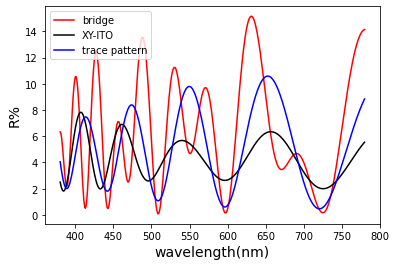

bridge: 6.411951140721681
xy-ITO: 4.264772435351811
pattern: 5.069525107969959
delta_d_t: 1.9156583900870925
delta_d_b: 3.499670105425313


In [10]:
tk = f1
wl = np.linspace(380, 780, 401)

plt.plot(wl, 100*hypo_bri(tk, wl, 550), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk, wl, 550), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk, wl, 550), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('Nanya_Bonsai_sim.png')
plt.show()

print('bridge:',100*np.mean(hypo_bri(tk, wl, 550)))
print('xy-ITO:',100*np.mean(hypo_dia(tk, wl, 550)))
print('pattern:',100*np.mean(hypo_tra(tk, wl, 550)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk, wl, 550)-100*hypo_dia(tk, wl, 550))))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk, wl, 550)-100*hypo_dia(tk, wl, 550))))